In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies = pd.read_csv("movies.dat", sep="::", names=["MovieID", "Title", "Genres"], encoding='ISO-8859-1')
movies.head()


<ipython-input-11-fd074713ef33>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("movies.dat", sep="::", names=["MovieID", "Title", "Genres"], encoding='ISO-8859-1')


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv("ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings.head()

<ipython-input-12-935134e59296>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'])


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
# import user dataset
users = pd.read_csv("users.dat", sep="::", names=['UserID','Gender', 'Age', 'Occupation', 'zip-code'])

#read the sample user dataset
users.head()

<ipython-input-13-72302372d806>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("users.dat", sep="::", names=['UserID','Gender', 'Age', 'Occupation', 'zip-code'])


,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
# merge the rating and users with movieID AND userID to create new dataset (master_data)
rating_user = pd.merge(ratings,users, on=['UserID'])
rating_movie = pd.merge(ratings,movies,on=['MovieID'])

master_data = pd.merge(rating_user,rating_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


<function matplotlib.pyplot.show(close=None, block=None)>

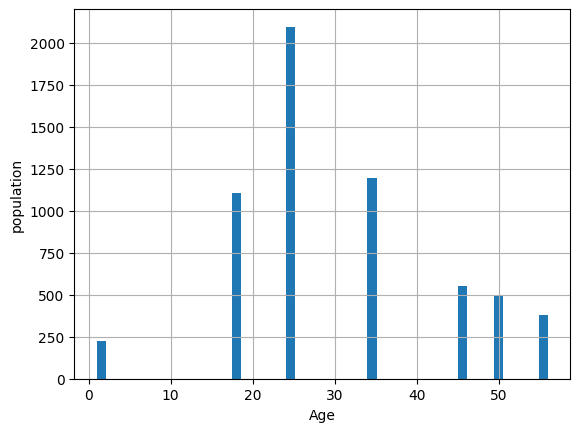

In [ ]:
# Viual Representation...

# 1.user Age distribution..

import matplotlib.pyplot as plt

users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('population')
plt.show

In [ ]:
# user rating of the movie "Toy story"

res = master_data[master_data.title == "Toy story (1995)"]

plt.plot(res.groupby("Age")["MovieID"].count())
res = master_data[master_data['Title'].str.contains("Toy Story (1995)")]
plt.plot(res.groupby("Age")["MovieID"].count())

AttributeError: ignored

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

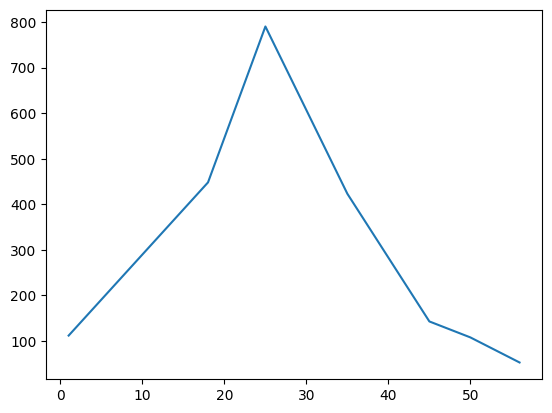

In [ ]:
res = master_data[master_data.Title == "Toy Story (1995)"]
plt.plot(res.groupby("Age")["MovieID"].count())

res.groupby("Age")["MovieID"].count()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

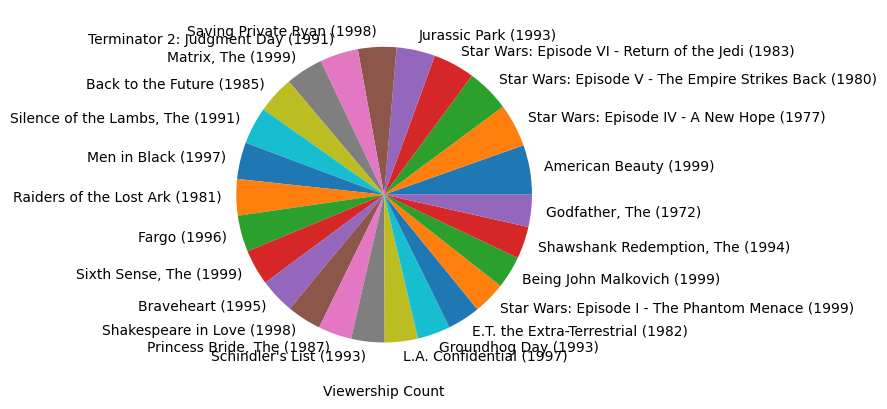

In [ ]:
# top 25 movie by viewership rating

res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="pie")
print(res)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
439998,2991,Live and Let Die (1973),2690,25,M,7,3
439999,593,"Silence of the Lambs, The (1991)",2690,25,M,7,5
440000,1272,Patton (1970),2690,25,M,7,4
440001,2401,Pale Rider (1985),2690,25,M,7,4
440002,3471,Close Encounters of the Third Kind (1977),2690,25,M,7,4
440003,3498,Midnight Express (1978),2690,25,M,7,4
440004,608,Fargo (1996),2690,25,M,7,5
440005,800,Lone Star (1996),2690,25,M,7,5
440006,858,"Godfather, The (1972)",2690,25,M,7,5
440007,1393,Jerry Maguire (1996),2690,25,M,7,3


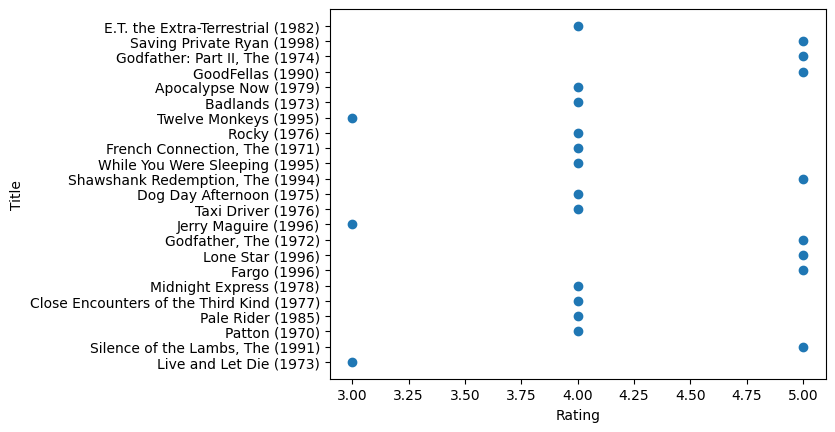

In [ ]:
# find rating of all the movie reviewed by perticular user of user id = 2690

res = master_data[master_data.UserID == 2690]

plt.scatter(y=res.Title, x=res.Rating)
plt.xlabel('Rating')
plt.ylabel('Title')
res

In [ ]:
# feature engneering


val = movies.Genres.str.split("|")

res_col = []
for v in val:
  for i in v:
    if i not in res_col:
      res_col.append(i)

res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")

df = pd.DataFrame(columns=res_col)

res = master_data.merge(movies, on = ['MovieID'], how="left")[["Genres","Rating","Gender","Age"]]

for index, row in res.head(20000).iterrows():
  tmp = row.Genres.split("|")

  for i in tmp:

    df.loc[index,i] = 1
    df.loc[index,"Gender"] = res.loc[index,"Gender"]
    df.loc[index,"Rating"] = res.loc[index,"Rating"]

    df.loc[index,df.columns[~df.columns.isin(tmp+["Gender","Rating","Age"])]] = 0

    df.head()



In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[df.columns[~df.columns.isin(["Rating"])]]
Y = df.Rating

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

number = LabelEncoder()
X_train.Gender = number.fit_transform(X_train["Gender"].astype("str"))
X_test.Gender = number.fit_transform(X_test["Gender"].astype("str"))
Y_train = number.fit_transform(Y_train.astype("int"))
Y_test = number.fit_transform(Y_test.astype("int"))

In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Assuming x_train contains missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Creating an SVM model with linear kernel and C=1
svm_model_linear = SVC(kernel='linear', C=1)
svm_model_linear.fit(X_train_imputed, Y_train)

# Now predict and calculate accuracy as before

SVC(C=1, kernel='linear')

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Creating an instance of the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Fitting the model to the training data
model.fit(X_train, Y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating accuracy
accuracy = model.score(X_test, Y_test)

# Creating a confusion matrix if needed
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)

# Printing the confusion matrix and accuracy
print(cm)
print("Accuracy:", accuracy)

[[   0    1   36  227    4]
 [   0    0   62  406   14]
 [   0    2  134 1176   56]
 [   0    2  156 1454   98]
 [   0    2   79  978  113]]
Accuracy: 0.3402


In [ ]:
#


In [ ]:
# KNN MODEL

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Assuming x_train contains missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Creating a KNeighborsClassifier model with n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_imputed, Y_train)

# Predicting and calculating accuracy
X_test_imputed = imputer.transform(X_test)  # Impute test data as well
accuracy = knn.score(X_test_imputed, Y_test)

# Creating a confusion matrix
knn_predictions = knn.predict(X_test_imputed)
cm = confusion_matrix(Y_test, knn_predictions)

# Printing the confusion matrix and accuracy
print(cm)
print("Accuracy:", accuracy)

[[  4  21 129  80  34]
 [ 11  34 254 122  61]
 [ 25  86 608 451 198]
 [ 36 107 753 542 272]
 [ 12  61 441 398 260]]
Accuracy: 0.2896


SVM - Accuracy = 0.3402

KNN - Acuuracy = 0.2869

